# Module 6 - Evaluating Predictive Performance

## Module Overview

- Learn to evaluate machine learning algorithms based on their performance using various performance measures, i.e., RMSE, to firstly judge whether the models produce satisifcatory results, and to select the best model out of multiple.

## Learning outcomes

- LO 1: Evaluate regression problems using performance measures where the output variable is numerical.
- LO 2: Evaluate performance in classification problems where the output variable is categorical using a confusion matrix.
- LO 3: Evaluate the performance of ranking problems using lift charts.
- LO 4: Identify challenges in different industries that can be addressed by machine learning competitions.

## Misc and Keywords

- Nothing this week

## Module Summary Description

- In machine learning, it's important to measure how well a method performs on a validation set so that the best method can be selected for a given machine learning application. In this module, you will learn about ranking problems and explore a case study application of predictive performance evaluation. 
- Performance assessment differs for classification and regression problems.
    - In classification, the output is a categorical variable, it is easy to say yes this is correct, or no it is not.
    - For regression problems the output is a continous variable and we do not expect the model to be spot on with its prediction
- Both classification and regression also have ranking problems which mean ...... continue

## Performance Measures For Regression Problems

#### **Mean Absolute Error (MAE)**  
- MAE measures the average magnitude of errors between actual values ($y$) and predicted values ($\hat{y}$).
- A low MAE indicates that the model's predictions are close to the actual values on average.
- A high MAE suggests larger average errors, meaning the model is less accurate.
- $\text{MAE = np.mean(np.abs(y - y1))}$
$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

#### **Average Error (AE)**  
- AE gives the average signed error, where positive and negative errors can cancel out.
- A positive AE indicates overprediction on average.
- A negative AE indicates underprediction on average.
- $\text{AE = np.mean(y - y1)}$
$$ \text{AE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) $$

#### **Mean Absolute Percentage Error (MAPE)**    
- MAPE measures the average percentage error relative to the actual values.
- A low MAPE suggests the model predicts well on a relative scale.
- A high MAPE means that errors are large relative to the actual values.
- $\text{MAPE = np.mean(np.abs((y - y1) / y)) * 100}$
$$ \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100 $$

#### **Root Mean Squared Error (RMSE)**  
- RMSE measures the square root of the average squared errors.
- Penalizes large errors more heavily than MAE because of the squaring.
- A low RMSE indicates better predictive performance.
- A high RMSE highlights larger deviations in predictions.
- $\text{RMSE = np.sqrt(np.mean((y - y1) ** 2))}$
$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

#### **Total Sum of Squared Errors (SSE)**  
- SSE measures the total squared deviation of predictions from actual values.
- It represents the overall error without normalization.
- A low SSE means better predictive performance, but its scale depends on the dataset size.
- $\text{SSE = np.sum((y - y1) ** 2)}$
$$ \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In [70]:
import numpy as np

# Extract columns as individual arrays
Y = np.array([2.7, 4.2, 3.5, 7.2, 1.8])
m1 = np.array([3.2, 3.8, 3.7, 6.8, 2.2])  # Estimate of y from model 1
m2 = np.array([2.5, 4.0, 3.4, 6.9, 1.6]) # Estimate of y from model 2

y = m1

# Metrics
MAE = np.mean(np.abs(Y - y))
print("MAE: ", round(MAE, 4))

AE = np.mean(Y - y)
print("AE: ", round(AE, 4))

MAPE = np.mean(np.abs((Y - y) / Y)) * 100
print("MAPE: ", round(MAPE, 4))

RMSE = np.sqrt(np.mean((Y - y) ** 2))
print("RMSE: ", round(RMSE, 4))

SSE = np.sum((Y - y) ** 2)
print("SSE: ", round(SSE, 4))

MAE:  0.38
AE:  -0.06
MAPE:  12.3069
RMSE:  0.3924
SSE:  0.77


## Performance Measures For Classification Problems

- The output of a classification problem is a categorial variable so regression performance measures do not work
- Instead a confusion matrix can be used to judge performance

### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual target values with the predictions made by the model. Here's an example of a confusion matrix layout:

| Actual \ Predicted | Positive | Negative |
|---------------------|----------|----------|
| **Positive**        | True Positive (TP)  | False Negative (FN) |
| **Negative**        | False Positive (FP) | True Negative (TN)  |

### Explanation:
- **True Positive (TP)**: The model correctly predicted the positive class.
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)**: The model incorrectly predicted the positive class when it was actually negative (Type I Error).
- **False Negative (FN)**: The model incorrectly predicted the negative class when it was actually positive (Type II Error).

### Metrics Derived from the Confusion Matrix:
1. **Accuracy**:  
   The accuracy metric tells you the overall correctness of the model by calculating the proportion of correct predictions to the total predictions.  
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

2. **Precision**:  
   Precision measures the proportion of positive predictions that are actually correct. A higher precision means that when the model predicts positive, it is more likely to be correct.  
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall (Sensitivity)**:  
   Recall (also known as sensitivity) measures the proportion of actual positives that are correctly identified by the model. A higher recall indicates that the model is better at identifying the positive class.
   - focuses on the model's ability to correctly predict positives.
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

5. **F1-Score**:  
   The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the class distribution is imbalanced. A higher F1-score indicates a better balance between precision and recall.  
   $$
   \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

6. **Specificity**:
   Specificity measures the proportion of actual negatives that are correctly identified as negative by the model.
   - Specificity focuses on the model's ability to correctly predict negatives.
   $$
   \text{Specificity} = \frac{TN}{FP + TN}
   $$

   
8. **Estimation Misclassification Rate**
    Shows the proportion of incorrect predictions
    $$
    \text{Total Error Rate} = \frac{FN + FP}{TP + FN + FP + TN}
    $$


### Example:
For a binary classification problem, suppose we have the following confusion matrix:

| Actual \ Predicted | Positive | Negative |
|---------------------|----------|----------|
| **Positive**        | 50       | 10       |
| **Negative**        | 5        | 35       |

From this, we can calculate:
- **Accuracy**: $ \frac{50 + 35}{50 + 35 + 10 + 5} = 85\% $
  - **What it shows**: 85% of the total predictions made by the model are correct.
- **Precision**: $ \frac{50}{50 + 5} = 90.9\% $
  - **What it shows**: 90.9% of the predicted positive values are actually positive.
- **Recall**: $ \frac{50}{50 + 10} = 83.3\% $
  - **What it shows**: 83.3% of the actual positive values are correctly identified by the model.
- **F1-Score**: $ 2 \cdot \frac{0.909 \cdot 0.833}{0.909 + 0.833} = 87\% $
  - **What it shows**: The F1-score balances precision and recall, providing a combined measure of how well the model performs in both aspects.



## Lift Charts for Classification Problems
- A lift chart (also known as a cumulative gains chart) is a visual tool used in predictive modeling and data mining to assess the performance of a classification model. It helps you understand how much better your model performs compared to random guessing.
- Lift charts display the model's ability to "lift" or improve the targeting efficiency over a baseline (usually random chance). They plot the cumulative percentage of positive outcomes (e.g., responders, buyers) against the percentage of the population targeted.
- **the lift chart algorithm for regression problems:**
    1. Sort validation records by decreasing predicted outcome value.
    2. For each sorted validation record i = 1, …, n:.
    3. Plot the point (i, cumulative sum of actual outcome values in the validation records {1…i}).
    4. Compare it against the 'average classifier' with points (i, i * average outcome over all validation records) as well as the 'perfect classifier' with points (i, sum of i largest outcome values in all of the validation records).
- **the lift chart algorithm for classification problems:**
    1. Sort validation records by decreasing propensity (estimated probability of belonging to the important 'yes' class).
    2. For each sorted validation record, i = 1, …, n:.
    3. Plot the point (i, # of actual 'yes' class members in the validation records {1…i}).
    4. Compare it against the 'random classifier' with points (i, i * percentage of 'yes' class members in validation set) as well as the 'perfect classifier' with points (i, min {i, number of 'yes' class members in validation set}).
- **Why Are Lift Charts Useful?**
    - Compare Model Effectiveness: Lift charts provide a direct way to measure how much better your model is compared to random selection. If the model significantly "lifts" the positive outcomes above the baseline, it’s effective.
    - Help Optimize Resources: In scenarios where resources (like marketing spend or time) are limited, lift charts allow you to identify the top portion of the population (e.g., top 10%) that yields the most positive outcomes, enabling efficient resource allocation.
    - Provide Intuitive Insights: They offer an intuitive way for stakeholders to understand the model’s value, particularly in situations where ranking and targeting are important.
    - Evaluate Model Thresholds: Lift charts show the cumulative effect of targeting different proportions of the population, helping decide where to set thresholds for actions.
- **What Can You Derive From Lift Charts?**
    - Lift Value: The lift at any given point (e.g., top 10% of the population) shows how much more likely you are to achieve positive outcomes using the model compared to random selection.
    - Top Performers: By observing the steepness of the curve at the start, you can identify the best-performing segment of the population.
    - Diminishing Returns: If the lift curve flattens out as you move to target larger proportions of the population, it indicates diminishing returns (lower model effectiveness for those segments).
    - Overall Effectiveness: The area between the model's curve and the baseline represents the model's overall ability to improve targeting efficiency

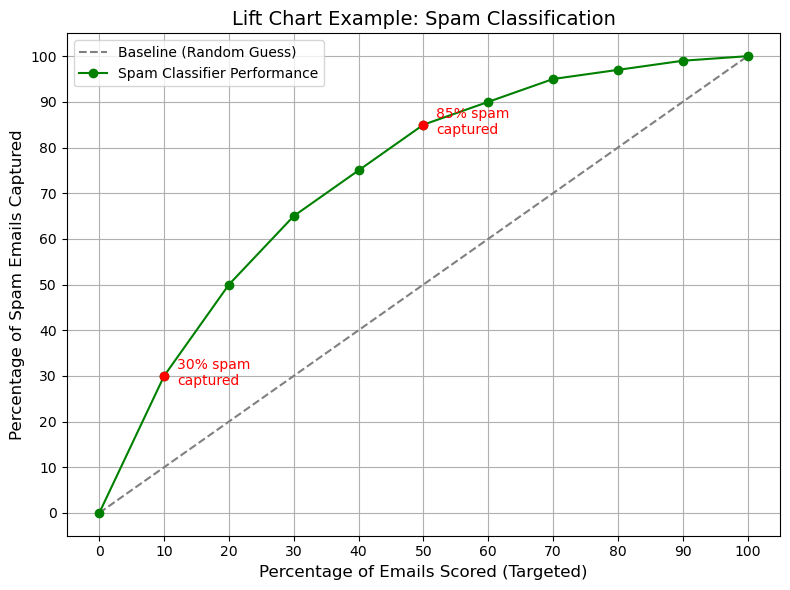

In [93]:
# Simulated data for a lift chart in a spam classification context
percent_population = np.linspace(0, 100, 11)  # 0% to 100% in increments of 10%
baseline = percent_population  # Random guess (diagonal line)
model_spam = [0, 30, 50, 65, 75, 85, 90, 95, 97, 99, 100]  # Model identifying spam emails

# Plotting the lift chart for spam classification
plt.figure(figsize=(8, 6))
plt.plot(percent_population, baseline, label="Baseline (Random Guess)", linestyle="--", color="gray")
plt.plot(percent_population, model_spam, label="Spam Classifier Performance", marker="o", color="green")

# Adding labels and annotations specific to spam classification
plt.title("Lift Chart Example: Spam Classification", fontsize=14)
plt.xlabel("Percentage of Emails Scored (Targeted)", fontsize=12)
plt.ylabel("Percentage of Spam Emails Captured", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))

# Highlight specific points for better interpretation
plt.scatter([10], [30], color="red", zorder=5)
plt.text(12, 28, "30% spam\ncaptured", fontsize=10, color="red")

plt.scatter([50], [85], color="red", zorder=5)
plt.text(52, 83, "85% spam\ncaptured", fontsize=10, color="red")

# Show the chart
plt.tight_layout()
plt.show()

- Here is a lift chart example for classifying emails as spam or not:
    - Gray Dashed Line (Baseline): Represents random guessing, where targeting X% of emails would capture X% of spam emails.
    - Green Line (Spam Classifier Performance): Shows how effectively the classifier identifies spam emails when ranking emails by their spam score.
- **Key Insights:**
    - Early Gain (10% of emails): The classifier captures 30% of all spam emails by targeting just 10% of the email population, showing high initial effectiveness.
    - High Coverage (50% of emails): By targeting the top 50% of emails, the classifier captures 85% of the spam emails.
    - Diminishing Returns: The curve flattens as the classifier approaches 100% of the population, where its ability to differentiate diminishes.